In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
import warnings
warnings.filterwarnings('ignore')


In [3]:
wine_df = pd.read_csv('\\Users\THEOFIRE\Desktop\DATA\Wine_prediction\winequalityN.csv')
#wine_df.head()
display(pd.concat([wine_df.head(3),wine_df.tail(3)]))

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


let's know what data tpyes contained in our dataset

In [4]:
wine_df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


oops.. we got some missing values 

In [6]:
wine_df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [7]:
for col,value in wine_df.items():
    if col != "type":
        wine_df[col] = wine_df[col].fillna(wine_df[col].mean())
    

let's do some verification of the dataset

In [8]:
wine_df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


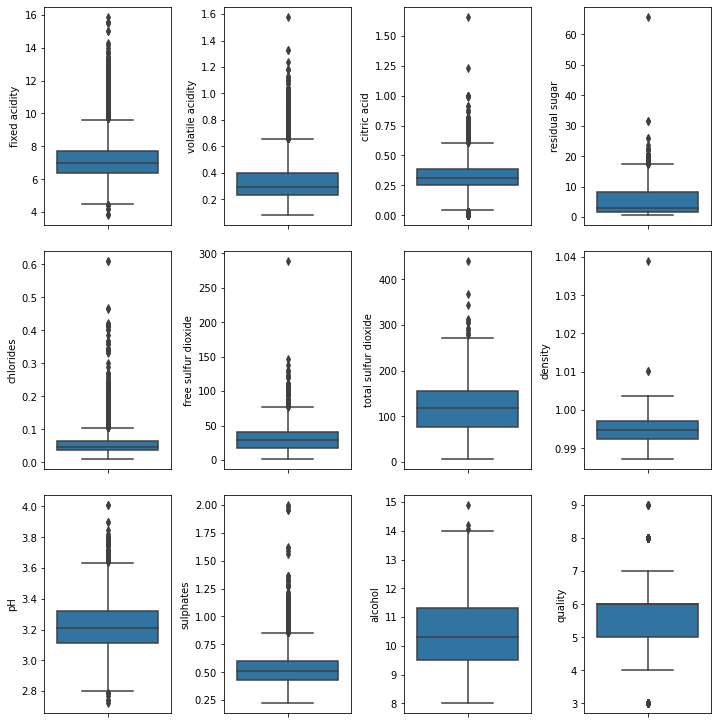

In [10]:
fig, ax = plt.subplots(ncols=4,nrows=3,figsize=(10,10))
index= 0
ax = ax.flatten()

for col,value in wine_df.items():
    if col != 'type':
        sns.boxplot(y=col,data=wine_df,ax= ax[index])
        index +=1
plt.tight_layout(pad=0.5, w_pad=1,h_pad=2)

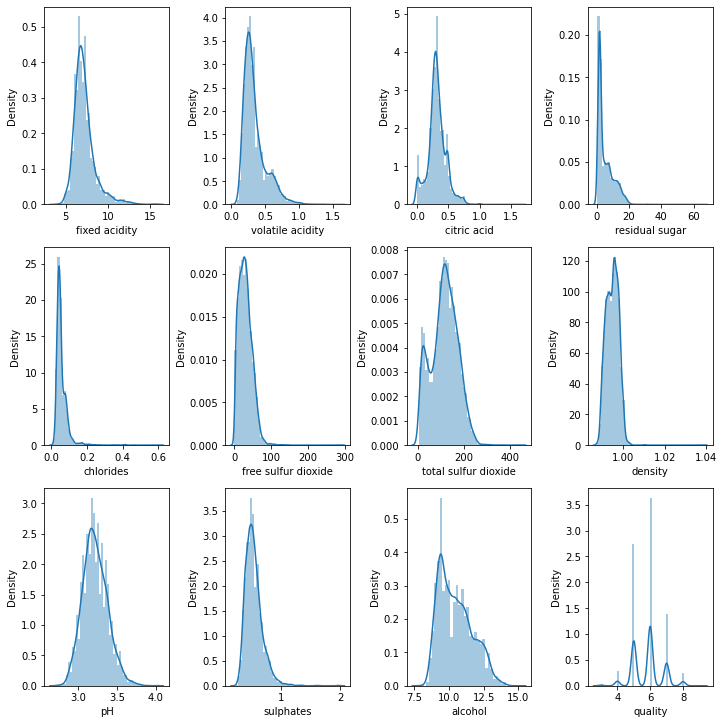

In [11]:
fig, ax = plt.subplots(ncols= 4, nrows=3, figsize=(10,10))
ax=ax.flatten()
index=0

for col,value in wine_df.items():
    if col !='type':
        sns.distplot(value,ax=ax[index])
        index +=1
plt.tight_layout(pad=.5,h_pad=1,w_pad=.2)

removing the outliers using the interquatile range

In [12]:
cols = ['residual sugar','density','free sulfur dioxide']

Q1 = wine_df[cols].quantile(0.25)
Q3 = wine_df[cols].quantile(0.75)

IQR = Q3-Q1

wine_df= wine_df[~((wine_df[cols]< (Q1-1.5*IQR))| (wine_df[cols]>(Q3 + 1.5*IQR))).any(axis=1)]


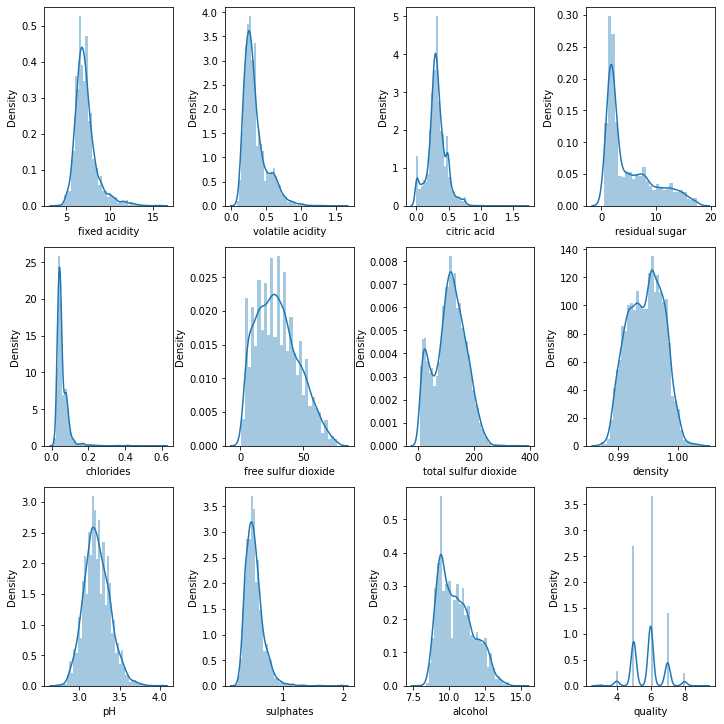

In [13]:
fig, ax = plt.subplots(ncols= 4, nrows=3, figsize=(10,10))
ax=ax.flatten()
index=0

for col,value in wine_df.items():
    if col !='type':
        sns.distplot(value,ax=ax[index])
        index +=1
plt.tight_layout(pad=.5,h_pad=1,w_pad=.2)

The total sulfur dioxide column needs to be Normalised

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

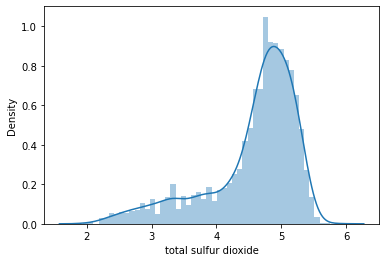

In [14]:
wine_df['total sulfur dioxide'] = np.log(1+ wine_df['total sulfur dioxide'] )

sns.distplot(wine_df['total sulfur dioxide'])

In [38]:
wine_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,white,6.3,0.300,0.34,1.6,0.049,14.0,4.890349,0.99400,3.30,0.490000,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,4.584967,0.99510,3.26,0.440000,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,5.231109,0.99560,3.19,0.400000,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,5.231109,0.99560,3.19,0.400000,9.9,6
5,white,8.1,0.280,0.40,6.9,0.050,30.0,4.584967,0.99510,3.26,0.440000,10.1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,3.806662,0.99490,3.45,0.580000,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,3.951244,0.99512,3.52,0.531215,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,3.713572,0.99574,3.42,0.750000,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,3.806662,0.99547,3.57,0.710000,10.2,5


<AxesSubplot:xlabel='type', ylabel='count'>

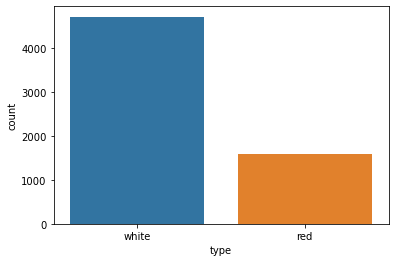

In [15]:
sns.countplot(wine_df.type)

This dataset gives more count for white wine than the red wine. our model might be bias if the count is not balanced

<AxesSubplot:xlabel='quality', ylabel='count'>

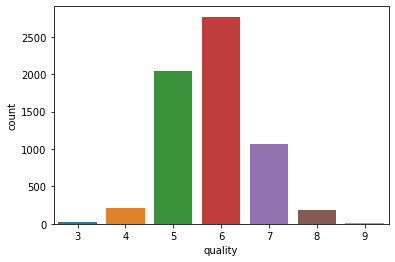

In [16]:
sns.countplot(wine_df.quality)

The type is not balanced as there is more white wine than red wine. morealso, there are missing data for quality 1,2

<AxesSubplot:>

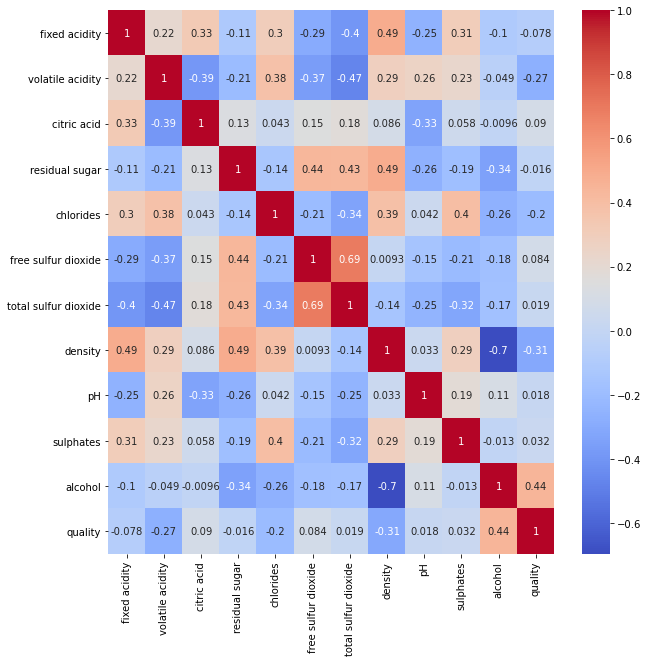

In [17]:
fig,ax = plt.subplots(figsize= (10,10))
sns.heatmap(wine_df.corr(),annot= True,
            cmap= 'coolwarm')

we can decide to remove one of the pairs due to their correlation with one another, namely- alcohol:density and total sulfur dioxide:free sulphur oxide

In [18]:
X= wine_df.drop(['quality','type','density','total sulfur dioxide'],axis=1)
Y= wine_df['quality']


## solving the class imblancement

In [19]:
# Y = wine_df['quality'].apply(lambda Y_value: 1 if Y_value>=7 else 0)

In [20]:
from sklearn.metrics import DistanceMetric
from imblearn.over_sampling import SMOTE

oversample = SMOTE(k_neighbors= 4)

X,Y =oversample.fit_resample(X,Y)

we can view the numbers of the quality now,

In [21]:
Y.value_counts()

9    2770
8    2770
7    2770
6    2770
5    2770
4    2770
3    2770
Name: quality, dtype: int64

## Model Training

In [22]:
def Classifier(model, X, Y):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 30)
    #train the model for each classifer
    model.fit(x_train, y_train)
    print("Model Acurracy: ", model.score(x_test,y_test)*100)
    
    #cross-validation score
    cv_score = cross_val_score(model,X,Y, cv=5)
    print("CV score: ", np.mean(cv_score)*100)

In [23]:
model= LogisticRegression()
Classifier(model,X,Y)

Model Acurracy:  38.44765342960289
CV score:  36.9778236204229


In [24]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
Classifier(model,X,Y)

Model Acurracy:  81.17586384734399
CV score:  75.29654461062403


In [25]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
Classifier(model,X,Y)

Model Acurracy:  88.67973182052604
CV score:  82.99638989169675


In [26]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
Classifier(model,X,Y)

Model Acurracy:  90.17534811758638
CV score:  84.20835482207323


In [27]:
import xgboost as xgb
xgb.set_config(verbosity=0)
# model= xgboost.XGBClassifier(eval_metric='mlogloss')
Classifier(model,X,Y)

Model Acurracy:  89.89169675090253
CV score:  84.36307374935535


In [28]:
import lightgbm as lgb
model= lgb.LGBXGBMClassifier()
Classifier(model,X,Y)

ModuleNotFoundError: No module named 'lightgbm'

labeling the quality of the wine as good =1 and bad = 0

In [29]:
X= wine_df.drop(['quality','type','density','total sulfur dioxide'],axis=1)
Y= wine_df['quality']

In [30]:
# let's view our X, so that we can have an ideal of the input parameter.
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,pH,sulphates,alcohol
1,6.3,0.300,0.34,1.6,0.049,14.0,3.30,0.490000,9.5
2,8.1,0.280,0.40,6.9,0.050,30.0,3.26,0.440000,10.1
3,7.2,0.230,0.32,8.5,0.058,47.0,3.19,0.400000,9.9
4,7.2,0.230,0.32,8.5,0.058,47.0,3.19,0.400000,9.9
5,8.1,0.280,0.40,6.9,0.050,30.0,3.26,0.440000,10.1
...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,3.45,0.580000,10.5
6493,5.9,0.550,0.10,2.2,0.062,39.0,3.52,0.531215,11.2
6494,6.3,0.510,0.13,2.3,0.076,29.0,3.42,0.750000,11.0
6495,5.9,0.645,0.12,2.0,0.075,32.0,3.57,0.710000,10.2


In [31]:
Y = wine_df['quality'].apply(lambda Y_value: 1 if Y_value>=7 else 0)
Y.shape

(6318,)

## Build the predictive system

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 30)
x_train.to_csv('train.csv',index=False)
x_test.to_csv('test.csv',index=False)

opt_model=ExtraTreesClassifier()
#train the model for each classifer
opt_model.fit(x_train, y_train)

ExtraTreesClassifier()

In [33]:
input_parameter=(6.1,0.28,0.27,4.7,0.03,140,3.16,0.42,12.5)

#changing the input data to numpy array
input_parameter_as_numpy_array= np.asarray(input_parameter)

input_parameter_reshape= input_parameter_as_numpy_array.reshape(1,-1)

prediction= opt_model.predict(input_parameter_reshape)

if (prediction[0]==1):
    print('Good wine')
else: print('Bad wine')


Good wine
